# Task 2 - GSEA Hallmark analysis for each cluster
This notebook does a GSEA Hallmark analysis for each cluster (collapsing all cells from each cluster, as a bulk rna seq).

This notebook is based on the single-cell best practices book (https://github.com/theislab/single-cell-best-practices/). For further explanations of the applied methods please refer to above source.

# Gene set enrichment and pathway analysis 

### Prepare and explore the data

In [1]:
import os
os.environ['R_HOME'] = '/home/icb/till.richter/anaconda3/envs/da_env/lib/R'

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info



anndata2ri.activate()

In [3]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [4]:
%load_ext rpy2.ipython

In [5]:
!python -m rpy2.situation

rpy2 version:
3.4.5
Python version:
3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Looking for R's HOME:
    Environment variable R_HOME: /home/icb/till.richter/anaconda3/envs/da_env/lib/R
    Calling `R RHOME`: /usr/lib64/R
    Environment variable R_LIBS_USER: ~/R/x86_64-conda-linux-gnu-library/4.1
R's additions to LD_LIBRARY_PATH:

R version:
    In the PATH: R version 3.6.0 (2019-04-26) -- "Planting of a Tree"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/home/icb/till.richter/anaconda3/envs/da_env/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'iconv', 'icuuc', 'icui18n']
  library_dirs:
  ['/home/icb/till.richter/anaconda3/envs/da_env/lib', '/home/icb/till.richter/anaconda3/envs/da_env/lib/R/lib', '/home/icb/till.richter/anaconda3/envs/da_env/lib']
  extra_compile_args:
  []
  extra_link_args:
  ['-Wl,--export-dynamic', '-fopenmp', '-Wl,-O2', '-Wl,--sort-

In [6]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(fgsea)
    library(AUCell)
    library(ggplot2)
})

In [7]:
adata_read = sc.read_h5ad('../data/adata/rev_processed_adata4.h5ad')
adata_read.obs

,sample_id,sample_nr,donor,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,log_counts,n_counts,n_genes,size_factors
AAACCCAAGCTGCCTG-1-1,16992-2D,1,mouse,3113,8.043663,9743.0,9.184407,34.014164,42.297034,51.021246,64.087037,1352.0,7.210080,13.876629,9.184304,9743.0,3113,2.311483
AAACCCAAGGTCATAA-1-1,16992-2D,1,mouse,2564,7.849714,7168.0,8.877522,27.734375,38.085938,48.660714,63.825335,507.0,6.230482,7.073103,8.877382,7168.0,2564,1.797364
AAACCCAAGTACCCTA-1-1,16992-2D,1,mouse,2819,7.944492,8436.0,9.040382,27.750119,38.205311,47.878141,62.849692,630.0,6.447306,7.467994,9.040263,8436.0,2819,2.083213
AAACCCACAAGGTCTT-1-1,16992-2D,1,mouse,1932,7.566828,4536.0,8.420021,26.410935,36.331570,47.266314,64.285714,277.0,5.627621,6.106702,8.419801,4536.0,1932,1.194047
AAACCCACAGGAGGTT-1-1,16992-2D,1,mouse,2930,7.983099,8959.0,9.100526,29.679652,38.910593,48.018752,62.808349,604.0,6.405229,6.741824,9.100414,8959.0,2930,2.356283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCTAGGTT-1-1,16992-2D,1,mouse,2192,7.693026,5087.0,8.534640,25.122862,34.499705,44.584234,60.723413,301.0,5.710427,5.917044,8.534444,5087.0,2192,1.351677
TTTGTTGGTGGACTGA-1-1,16992-2D,1,mouse,2301,7.741534,4901.0,8.497398,22.444399,31.034483,41.154866,57.702510,258.0,5.556828,5.264232,8.497194,4901.0,2301,1.457669
TTTGTTGTCACAAGAA-1-1,16992-2D,1,mouse,1168,7.063904,2138.0,7.668094,31.571562,39.569691,49.906455,68.755847,173.0,5.159055,8.091675,7.667626,2138.0,1168,0.492202
TTTGTTGTCCTACGGG-1-1,16992-2D,1,mouse,1908,7.554335,4492.0,8.410275,31.923419,41.874443,51.246661,66.651825,348.0,5.855072,7.747106,8.410053,4492.0,1908,1.097022


In [8]:
adata = adata_read.copy()

In [9]:
adata.layers['counts'] = adata.X

In [17]:
adata.obs['group'] = adata.obs['merged_louvain'].astype('string')

In [19]:
# find DE genes by t-test
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")

In [20]:
names0 = adata.uns['t-test']['names']['0']
pvals0 = adata.uns['t-test']['pvals']['0']
adj_pvals0 = adata.uns['t-test']['pvals_adj']['0']
logfc0 = adata.uns['t-test']['logfoldchanges']['0']

names1 = adata.uns['t-test']['names']['1']
pvals1 = adata.uns['t-test']['pvals']['1']
adj_pvals1 = adata.uns['t-test']['pvals_adj']['1']
logfc1 = adata.uns['t-test']['logfoldchanges']['1']

names2 = adata.uns['t-test']['names']['2']
pvals2 = adata.uns['t-test']['pvals']['2']
adj_pvals2 = adata.uns['t-test']['pvals_adj']['2']
logfc2 = adata.uns['t-test']['logfoldchanges']['2']

# Create some Pandas dataframes from some data.
df0 = pd.DataFrame({'Gene Names': names0, 'PVAL': pvals0, 'Adjusted PVAL': adj_pvals0, 'logFC': logfc0})
df1 = pd.DataFrame({'Gene Names': names1, 'PVAL': pvals1, 'Adjusted PVAL': adj_pvals1, 'logFC': logfc1})
df2 = pd.DataFrame({'Gene Names': names2, 'PVAL': pvals2, 'Adjusted PVAL': adj_pvals2, 'logFC': logfc2})

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('../rev_results/task2/4_tree-like_de_genes.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df0.to_excel(writer, sheet_name='Cluster0')
df1.to_excel(writer, sheet_name='Cluster1')
df2.to_excel(writer, sheet_name='Cluster2')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [21]:
adata.obs['group']

AAACCCAAGCTGCCTG-1-1    0
AAACCCAAGGTCATAA-1-1    1
AAACCCAAGTACCCTA-1-1    1
AAACCCACAAGGTCTT-1-1    0
AAACCCACAGGAGGTT-1-1    0
                       ..
TTTGTTGGTCTAGGTT-1-1    1
TTTGTTGGTGGACTGA-1-1    1
TTTGTTGTCACAAGAA-1-1    0
TTTGTTGTCCTACGGG-1-1    2
TTTGTTGTCTTTGCTA-1-1    0
Name: group, Length: 9190, dtype: category
Categories (5, string): [0, 1, 2, 3, 4]

In [22]:
celltype_condition0 = '0'
celltype_condition1 = '1'
celltype_condition2 = '2'

In [23]:
celltype_condition = celltype_condition1

In [25]:
adata.uns['t-test']['names'][celltype_condition]

array(['Hmgb2', 'Cdca8', 'Top2a', ..., 'Rpl27a', 'Fn1', 'Fth1'],
      dtype=object)

In [26]:
# extract ranked gene names and export to r
ranked_genes_ = adata.uns['t-test']['names'][celltype_condition]

In [27]:
%%R -i ranked_genes_
ranked_genes = ranked_genes_
head(ranked_genes)

[1] "Hmgb2"  "Cdca8"  "Top2a"  "Birc5"  "H2ax"   "Tubb4b"


In [28]:
# compute ranks and export to r
stats_ = adata.uns['t-test']['scores'][celltype_condition]

In [29]:
%%R -i stats_
stats = stats_

In [30]:
%%R
names(stats) = ranked_genes

In [31]:
%R -o stats

In [32]:
stats_df = pd.DataFrame(stats, index=ranked_genes_, columns=['Stats'])

### Cluster-level gene set enrichment analysis with fgsea

In [33]:
# MARK THESE GENE SETS LATER IN THE EXCEL TABLE

### Cluster 0
# HALLMARK_MITOTIC_SPINDLE

### Cluster 1
# HALLMARK_HYPOXIA
# HALLMARK_MTORC1_SIGNALING
# HALLMARK_GLYCOLYSIS

### Custer 2
# HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION

### Cluster 3
# HALLMARK_G2M_CHECKPOINT
# HALLMARK_E2F_TARGETS
# HALLMARK_MITOTIC_SPINDLE

### Cluster 4
# HALLMARK_UNFOLDED_PROTEIN_RESPONSE
# HALLMARK_MTORC1_SIGNALING
# HALLMARK_HYPOXIA
# HALLMARK_GLYCOLYSIS

In [34]:
%%R
# pathways <- gmtPathways('../data/Hallmark/16992_2D/Cluster0/HALLMARK_TNFA_SIGNALING_VIA_NFKB.v7.5.1.gmt')
all_pathways <- gmtPathways('../data/Hallmark/h.all.v7.5.1.symbols.gmt')

In [35]:
%%R
# my_pathways <- all_pathways['HALLMARK_HYPOXIA']
my_pathways <- all_pathways

In [36]:
from pyorthomap import FindOrthologs 
# then create the find orthogues object using correct datasets and attributes
# use help(FindOrthologs)
hs2mm = FindOrthologs(
          host = 'http://www.ensembl.org',
          mart = 'ENSEMBL_MART_ENSEMBL',
          from_dataset = 'hsapiens_gene_ensembl',
          to_dataset = 'mmusculus_gene_ensembl',
          from_filters = 'hgnc_symbol',
          from_values = ['TP53', 'TERT'],
          to_attributes = ['external_gene_name'],
          to_homolog_attribute = 'mmusculus_homolog_ensembl_gene',
          from_gene_id_name = 'human_ensembl_gene_id',
          to_gene_id_name = 'mouse_ensembl_gene_id'
    )
    
hs2mm.map()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.26it/s]


,external_gene_name,mouse_ensembl_gene_id,human_ensembl_gene_id,hgnc_symbol
0,Tert,ENSMUSG00000021611,ENSG00000164362,TERT
1,Trp53,ENSMUSG00000059552,ENSG00000141510,TP53


In [37]:
from pyorthomap import findOrthologsMmHs, findOrthologsHsMm
orthologies_mmhs = findOrthologsMmHs(from_filters = 'external_gene_name',
                  from_values = ranked_genes_).map()
                  # from_values = [list(stats_df.index)]).map() # [stats.gene.names]).map()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:04<00:00,  8.80it/s]


In [38]:
%%R -i orthologies_mmhs

# reorder the conversion table by names(stats)
# mm2hs <- mm2hs[match(names(stats), mm2hs$external_gene_name),]
orthologies_mmhs <- orthologies_mmhs[match(names(stats), orthologies_mmhs$external_gene_name),]
keep <- !is.na(orthologies_mmhs$hgnc_symbol)
stats <- stats[keep]
names(stats) <- orthologies_mmhs$hgnc_symbol[keep]
# names(stats)

In [39]:
%%R -o stats_names
stats_names <- names(stats)

In [40]:
stats_names

'HMGB2','CDCA8','TOP2A',...,'RPL27A','FN1','FTH1'


In [41]:
%%R
names(stats) <- stats_names

In [42]:
%%R 
fgseaRes <- fgsea(pathways = my_pathways, 
                  stats    = stats,
                  eps      = 0.0,
                  minSize  = 15,
                  maxSize  = 500)

In [43]:
%%R
pathway <- fgseaRes[[1]]
pval <- fgseaRes[[2]]
padj <- fgseaRes[[3]]
log2err <- fgseaRes[[4]]
ES <- fgseaRes[[5]]
NES <- fgseaRes[[6]]
size <- fgseaRes[[7]]

In [44]:
%R -o pathway
%R -o pval
%R -o padj
%R -o log2err
%R -o ES
%R -o NES
%R -o size

In [45]:
df = pd.DataFrame({'Pathway': np.array(pathway), 'PVAL': np.array(pval), 'Adjusted PVAL': np.array(padj), 'log2 Error': np.array(log2err), 'ES': np.array(ES), 'NES': np.array(NES), 'Size': np.array(size)})
df.to_excel('../rev_results/task2/4_tree-like_fgsea_cluster' + celltype_condition + '.xlsx')

In [47]:
df

,Pathway,PVAL,Adjusted PVAL,log2 Error,ES,NES,Size
0,HALLMARK_ADIPOGENESIS,9.969970e-01,9.979920e-01,0.003232,0.203846,0.557885,172
1,HALLMARK_ALLOGRAFT_REJECTION,8.368810e-02,1.821447e-01,0.287805,-0.254432,-1.120056,84
2,HALLMARK_ANDROGEN_RESPONSE,8.597376e-01,9.979920e-01,0.019079,0.292133,0.771394,80
3,HALLMARK_ANGIOGENESIS,2.685922e-04,1.104213e-03,0.498493,-0.681878,-2.219287,18
4,HALLMARK_APICAL_JUNCTION,6.209677e-01,9.573253e-01,0.036073,0.353116,0.947333,102
5,HALLMARK_APICAL_SURFACE,1.067588e-01,2.053481e-01,0.287805,-0.377935,-1.313260,23
6,HALLMARK_APOPTOSIS,2.314629e-01,3.892786e-01,0.083363,0.419390,1.136129,118
7,HALLMARK_BILE_ACID_METABOLISM,3.558067e-02,9.403462e-02,0.321776,-0.321294,-1.356777,64
8,HALLMARK_CHOLESTEROL_HOMEOSTASIS,8.524924e-01,9.979920e-01,0.020122,0.295292,0.766406,65
9,HALLMARK_COAGULATION,8.678991e-06,5.352044e-05,0.593325,-0.505076,-2.090099,61


In [46]:
%%R 
ggdat <- fgseaRes[order(fgseaRes$padj, decreasing=FALSE), ][1:20,]
ggdat

                               pathway         pval         padj   log2err
 1:               HALLMARK_E2F_TARGETS 1.106742e-49 4.094945e-48 1.8372250
 2:            HALLMARK_G2M_CHECKPOINT 2.538460e-43 4.696151e-42 1.7147970
 3:           HALLMARK_MITOTIC_SPINDLE 3.002660e-21 3.703280e-20 1.1953445
 4:            HALLMARK_MYC_TARGETS_V1 4.275735e-12 3.955055e-11 0.8870750
 5:           HALLMARK_SPERMATOGENESIS 4.196962e-07 3.105752e-06 0.6749629
 6:               HALLMARK_COAGULATION 8.678991e-06 5.352044e-05 0.5933255
 7:          HALLMARK_MTORC1_SIGNALING 2.616222e-05 1.382860e-04 0.5756103
 8: HALLMARK_UNFOLDED_PROTEIN_RESPONSE 5.635195e-05 2.606278e-04 0.5573322
 9:              HALLMARK_ANGIOGENESIS 2.685922e-04 1.104213e-03 0.4984931
10:                HALLMARK_DNA_REPAIR 3.179780e-04 1.176519e-03 0.4984931
11: HALLMARK_INTERFERON_ALPHA_RESPONSE 4.843639e-03 1.629224e-02 0.4070179
12:            HALLMARK_MYC_TARGETS_V2 9.743700e-03 3.004308e-02 0.3807304
13:         HALLMARK_KRAS

In [47]:
%%R
saveRDS(ggdat, file = "cache/4_tree-like/ggdat4.rds")
saveRDS(pathway, file = "cache/4_tree-like/pathway4.rds")
saveRDS(padj, file = "cache/4_tree-like/padj4.rds")


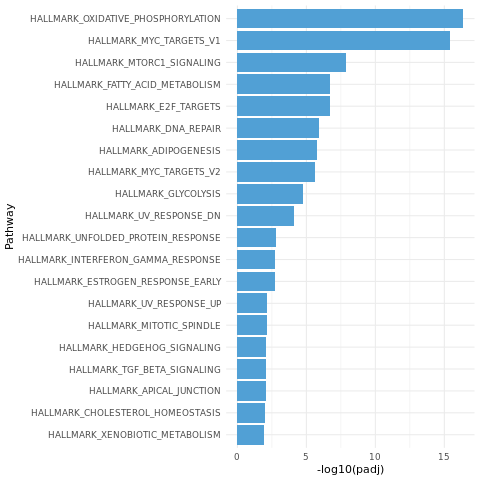

In [48]:
%%R
ggplot(ggdat, aes(x=reorder(pathway, -log10(padj)), y = -log10(padj))) +
    geom_bar(stat="identity", fill = "#51A0D5") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [47]:
save_dir = '../rev_results/task2/4_tree-like_fgsea_cluster' + celltype_condition + '.pdf'

Change cluster and working directory

In [48]:

%%R -i save_dir
ggsave(
  'git/isf_pancreatic_cancer/latest_notebook/figures/fgsea/4_tree-like/cluster0.pdf',
  save_dir,
  plot = last_plot(),
  device = NULL,
  path = NULL,
  scale = 1,
  width = NA,
  height = NA,
  units = c("in", "cm", "mm", "px"),
  dpi = 300,
  limitsize = TRUE,
  bg = NULL,
)


'\n%%R -i save_dir\nggsave(\n  # \'git/isf_pancreatic_cancer/latest_notebook/figures/fgsea/16992-2D/cluster0.pdf\',\n  save_dir,\n  plot = last_plot(),\n  device = NULL,\n  path = NULL,\n  scale = 1,\n  width = NA,\n  height = NA,\n  units = c("in", "cm", "mm", "px"),\n  dpi = 300,\n  limitsize = TRUE,\n  bg = NULL,\n)\n'

In [49]:
%%R
head(ggdat, n=1)

            pathway pval padj log2err         ES NES size
1: HALLMARK_HYPOXIA   NA   NA      NA -0.3621709  NA  146
                            leadingEdge
1: CP,CITED2,ALDOA,PRDX5,SDC2,DUSP1,...


In the plot above, pathway names are given in the y-axis. The x-axis is the $-\log_{10}$adjusted p-values. Therefore the longer the height of the bar, the more significant the pathway is. Pathways are ordered by significance. The majority of interferon-related pathways are indeed ranked among the top 20 most significantly enriched pathways. Some of the IFN-related pathways include, REACTOME_INTERFERON_SIGNALING (ranked 1), REACTOME_INTERFERON_ALPHA_BETA_SIGNALING (ranked 2nd), REACTOME_INTERFERON_GAMMA_SIGNALING (ranked 15th). Overall, `fgsea` did a decent job in identifying the pathways known to be associated with interferon signalling.

We apply some minor pre-processing here, including putting the count data back in the `.X` slot of the anndata object to proceed to the next part - that is, scoring the pathway activity levels per cell, for which we use another Bioconductor package, `AUCell`. 

In [50]:
del adata.uns
del adata.obs

In [51]:
#put counts back
adata.X = adata.layers['counts']